## Homework 1
Devon Kesseli <br>
NumPDE <br>
9/16/18 <br>

### [2]
__Write a function diffmat(x) that returns a square matrix $D$ that computes first derivatives at all points.__

For this problem I'm going to use the centerpoint first derivative scheme:

$\frac{d u}{dx} = \frac{-u_{i-1}+u_{i+1}}{2 dx}$

This matrix is constructed everywhere except at the boundaries, where a different scheme must be used.
__Boundaries__
Using the left and right difference fomulas at the endpoints will make the plot points off to the left or right.  To fix this I can use a technique similar to when we added phantom points outside the domain.

Noting that the left and right difference formulas are really finding the difference values halfway between points, I can simply take the difference between this and the center-point method for the point one away from the boundary, multiply it by two, and add to the center difference point.  The formula for this is shown below

For the left boundary point,
$\frac{du}{dx} = \frac{u_2 - u_0}{x_2-x_0} - 2 \Big[ \frac{u_2 - u_0}{x_2 - x_0} - \frac{u_1-u_0}{x_1 - x_0}\Big]$

Collecting each u term, in __D__ this becomes:

$D[0,0] = \frac{1}{x_2 - x_0} - \frac{2}{x_1-x_0}$ <br>
$D[0,1] = \frac{2}{x_1-x_0}$ <br>
$D[0,2] = \frac{-1}{x_2 - x_0}$ <br>

My Python is a little rusty, so some of this code will not be the smoothest or most concise.

In [79]:
import numpy
from matplotlib import pyplot

n = 10
x = numpy.linspace(-1, 1, n+1)

def diffmat(x):
    n = len(x) -1
    #Make the two diagonal vectors of center-difference distances (x_i+1)-(x_i-1) 
    #and append the values for using left and right FD at the endpoints.
    hhm=numpy.append((x[2:] - x[:-2]),(x[-1]-x[-2]))
    hhp=numpy.append((x[1]-x[0]),(x[2:] - x[:-2]))
    #Make the two diagonal vectors for u_i-1 and u_i+1
    up = numpy.ones(n)/hhp
    um = -numpy.ones(n)/hhm
    D= numpy.diag(up,1)+numpy.diag(um,-1)
    #Set up updated left and right finite difference on the boundaries (see text above)
    D[0,0] = -2/(x[1]-x[0])+1/(x[2]-x[0])
    D[0,1] = 2/(x[1]-x[0])
    D[0,2] = -1/(x[2]-x[0])
    D[-1,-1] = 2/(x[-1]-x[-2])-1/(x[-1]-x[-3])
    D[-1,-2] = -2/(x[-1]-x[-2])
    D[-1,-3] = 1/(x[-1]-x[-3])
    return D

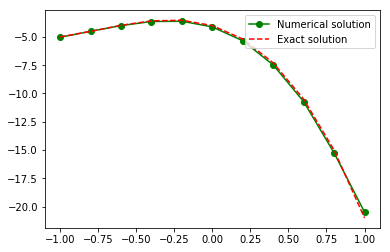

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

#TEST NUMBER ONE, A BIG POLYNOMIAL
n = 10
x = numpy.linspace(-1, 1, n+1)
D = diffmat(x)
u = numpy.transpose(numpy.matrix((-1*x**4-3*x**3-2*x**2-4*x+7)))
dudx = D * u
dudxExp = -4*x**3-9*x**2-4*x-4
plt.plot(x, dudx, 'go-',label="Numerical solution")
plt.plot(x, dudxExp, 'r--',label="Exact solution")
pyplot.legend(loc='upper right');

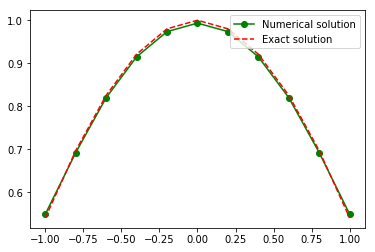

In [81]:
### TEST NUMBER TWO: SINE
n = 10
x = numpy.linspace(-1, 1, n+1)
D = diffmat(x)
u = numpy.transpose(numpy.matrix(numpy.sin(x)))
dudx = D * u
dudxExp = numpy.cos(x)
plt.plot(x, dudx, 'go-',label="Numerical solution")
plt.plot(x, dudxExp, 'r--',label="Exact solution")
pyplot.legend(loc='upper right');

### [3] Second Derivative
Write a function __diff2mat(x)__ that returns a square matrix $D_2$ that computes second derivatives at all points.

For the second derivative matrix, I'm going to linearly extrapolate at the boundaries.  This should give a reasonable approximation at the end-points. To set this up for uneven spacing, I'm using the compact stencil we derived in class [1 -2 1], making sure each point has the appropriate $\Delta x$ values.  

In [85]:
def diff2mat(x):
    #The delta x values for the u_i-1, u_i+1 and u_i are deririved.
    #These are set up to be the diagonals of the diff2 matrix.
    himinus1=numpy.append(1/((x[2:] - x[:-2])*(x[1:-1]- x[:-2])*0.5),0)
    hiplus1=numpy.append(0,1/((x[2:] - x[:-2])*(x[2:]- x[1:-1])*0.5))
    hi = numpy.append(0,- (1/(x[2:]- x[1:-1])+1/(x[1:-1]- x[:-2]))*(2/(x[2:] - x[:-2])))
    hi = numpy.append(hi,0)
    #The diff2 matrix is constructed. 
    D2 = numpy.diag(hiplus1,1) + numpy.diag(himinus1,-1) + numpy.diag(hi)
    #The second derivative is extrapolated for the left and right end-point.
    D2[0] = D2[1]+(D2[1]-D2[2])
    D2[-1] =D2[-2]+(D2[-2]-D2[-3])
    return numpy.matrix(D2)

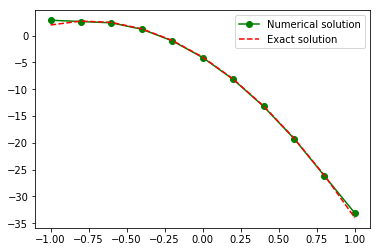

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

#TEST NUMBER ONE, A BIG POLYNOMIAL
n = 10
x = numpy.linspace(-1, 1, n+1)
D2 = diff2mat(x)
u = numpy.transpose(numpy.matrix((-1*x**4-3*x**3-2*x**2-4*x+7)))
d2udx2 = D2*u
d2udx2Exp = -12*x**2-18*x-4
plt.plot(x, d2udx2, 'go-', label="Numerical solution")
plt.plot(x, d2udx2Exp, 'r--', label="Exact solution")
pyplot.legend(loc='upper right');

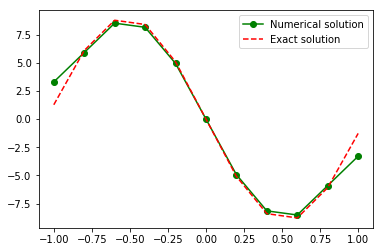

In [106]:
### TEST NUMBER TWO: SINE/COSINE
n = 10
x = numpy.linspace(-1, 1, n+1)
D2 = diff2mat(x)
u = numpy.transpose(numpy.matrix(numpy.sin(3*x)))
dudx = D2 * u
dudxExp = -9*numpy.sin(3*x)
plt.plot(x, dudx, 'go-', label="Numerical solution")
plt.plot(x, dudxExp, 'r--', label="Exact solution")
pyplot.legend(loc='upper right');

### [4] Even and Uneven Grid Spacing
Use test solutions to determine the order of accuracy of your methods for evenly and non-evenly spaced points. Which norm did you use?

I tried two different grid-spacing methods.  One is the classic evenly spaced grid.  The second chooses random points in the domain, and then sorts them for the diff2mat function.

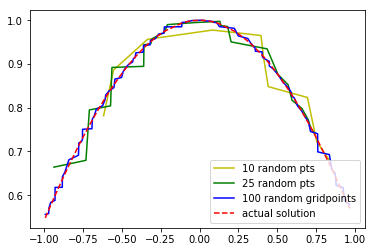

In [108]:
import random

#Evenly spaced grid function.
def evengrid(n):
    return numpy.linspace(-1, 1, n)

#Randomly generated grid function.
def randogrid(n):
    x = []
    for i in range(n):
        r1 = random.uniform(-1, 1)
        x = numpy.append(x,r1)
    x.sort()
    return x

### Randogrid test
# 3 different densities of randomly selected grid points were tested.
#This could have been done more gracefully with a for loop like the accuracy plots.  Maybe next time!
x10 = randogrid(10)
x25 = randogrid(25)
x100 = randogrid(100)
D10 = diffmat(x10)
D25 = diffmat(x25)
D100 = diffmat(x100)
u10 = numpy.transpose(numpy.matrix(numpy.sin(x10)))
u25 = numpy.transpose(numpy.matrix(numpy.sin(x25)))
u100 = numpy.transpose(numpy.matrix(numpy.sin(x100)))
dudx10 = D10 * u10
dudx25 = D25 * u25
dudx100 = D100 * u100
dudxExp = numpy.cos(x100)
plt.plot(x10, dudx10, 'y-',label="10 random pts")
plt.plot(x25, dudx25, 'g-',label="25 random pts")
plt.plot(x100, dudx100, 'b-',label="100 random gridpoints")
plt.plot(x100, dudxExp, 'r--',label="actual solution")
pyplot.legend(loc='lower right');


From this plot it's clear that as more random gridpoints are added, the solution does converge to the actual values.

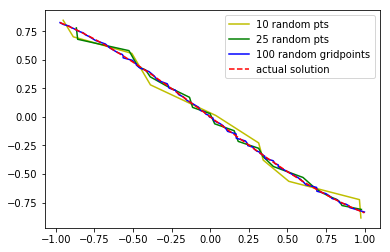

In [95]:
## Now a randogrid test for diff2mat.
import random

def evengrid(n):
    return numpy.linspace(-1, 1, n)

def randogrid(n):
    x = []
    for i in range(n):
        r1 = random.uniform(-1, 1)
        x = numpy.append(x,r1)
    x.sort()
    return x

### Randogrid test
n = 50

x10 = randogrid(10)
x25 = randogrid(25)
x100 = randogrid(100)
D10 = diff2mat(x10)
D25 = diff2mat(x25)
D100 = diff2mat(x100)
u10 = numpy.transpose(numpy.matrix(numpy.sin(x10)))
u25 = numpy.transpose(numpy.matrix(numpy.sin(x25)))
u100 = numpy.transpose(numpy.matrix(numpy.sin(x100)))
dudx10 = D10 * u10
dudx25 = D25 * u25
dudx100 = D100 * u100
dudxExp = -numpy.sin(x100)
plt.plot(x10, dudx10, 'y-',label="10 random pts")
plt.plot(x25, dudx25, 'g-',label="25 random pts")
plt.plot(x100, dudx100, 'b-',label="100 random gridpoints")
plt.plot(x100, dudxExp, 'r--',label="actual solution")
pyplot.legend(loc='upper right');

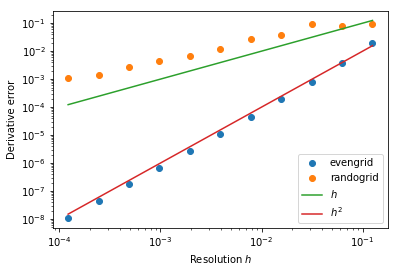

In [96]:
#Order of accuracy measurements
grids = 2**numpy.arange(3,14)
def grid_refinement_error(gridfunc, f, fp, diffmat):
    error = []
    for n in grids: 
        xx = gridfunc(n)
        D = diffmat(xx)
        uu = f(xx)
        u = numpy.transpose(numpy.matrix(uu))
        yy = D*u
        yy = numpy.asarray(yy).reshape(-1)
        error.append(numpy.linalg.norm(yy - fp(xx),numpy.inf))
    return grids, error;

ns, error = grid_refinement_error(evengrid, numpy.sin, numpy.cos, diffmat)


for gridstyles in (evengrid, randogrid):
    ns, error = grid_refinement_error(gridstyles, numpy.sin, numpy.cos, diffmat)
    pyplot.loglog(1/ns, error, 'o', label=gridstyles.__name__)
pyplot.loglog(1/grids, grids**(-1.), label='$h$')
pyplot.loglog(1/grids, grids**(-2.), label='$h^2$')
pyplot.xlabel('Resolution $h$')
pyplot.ylabel('Derivative error')
pyplot.legend(loc='lower right');

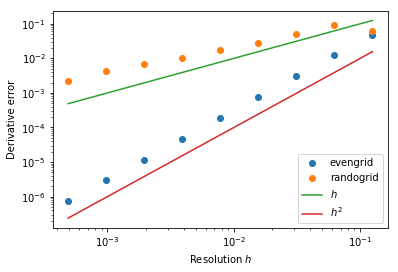

In [102]:

grids = 2**numpy.arange(3,12)
def grid_refinement_error(gridfunc, f, fp, diff2mat):
    error = []
    for n in grids: 
        xx = gridfunc(n)
        D = diff2mat(xx)
        uu = f(xx)
        u = numpy.transpose(numpy.matrix(uu))
        yy = D*u
        yy = numpy.asarray(yy).reshape(-1)
        error.append(numpy.linalg.norm(yy - fp(xx),numpy.inf))
    return grids, error;

#ns, error = grid_refinement_error(evengrid, numpy.sin, numpy.cos, diffmat)

def exactSol(x):
    return -numpy.sin(x)

for gridstyles in (evengrid, randogrid):
    ns, error = grid_refinement_error(gridstyles, numpy.sin, exactSol, diff2mat)
    pyplot.loglog(1/ns, error, 'o', label=gridstyles.__name__)
pyplot.loglog(1/grids, grids**(-1.), label='$h$')
pyplot.loglog(1/grids, grids**(-2.), label='$h^2$')
pyplot.xlabel('Resolution $h$')
pyplot.ylabel('Derivative error')
pyplot.legend(loc='lower right');

From these plots it's clear that the even grid is performing better, order $h^2$ vs order $h$.  The randomly selected grid points do seem to converge as more are added, to a consistent line.

In the two norm (below) the random setup performs less well (order $\sqrt{h}$)

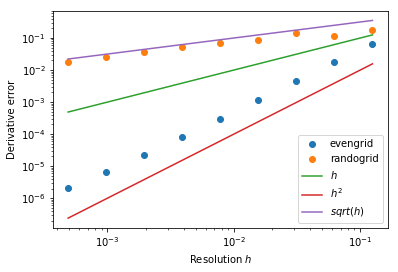

In [117]:
### THE TWO-NORM
grids = 2**numpy.arange(3,12)
def grid_refinement_error(gridfunc, f, fp, diff2mat):
    error = []
    for n in grids: 
        xx = gridfunc(n)
        D = diff2mat(xx)
        uu = f(xx)
        u = numpy.transpose(numpy.matrix(uu))
        yy = D*u
        yy = numpy.asarray(yy).reshape(-1)
        error.append(numpy.linalg.norm(yy - fp(xx),2))
    return grids, error;

#ns, error = grid_refinement_error(evengrid, numpy.sin, numpy.cos, diffmat)

def exactSol(x):
    return -numpy.sin(x)

for gridstyles in (evengrid, randogrid):
    ns, error = grid_refinement_error(gridstyles, numpy.sin, exactSol, diff2mat)
    pyplot.loglog(1/ns, error, 'o', label=gridstyles.__name__)
pyplot.loglog(1/grids, grids**(-1.), label='$h$')
pyplot.loglog(1/grids, grids**(-2.), label='$h^2$')
pyplot.loglog(1/grids, grids**(-0.5), label='$sqrt(h)$')
pyplot.xlabel('Resolution $h$')
pyplot.ylabel('Derivative error')
pyplot.legend(loc='lower right');